In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
url = 'https://drive.google.com/file/d/1XiY9b9jHv_MSiaPFTczpKz2xs5FTvX2u/view?usp=sharing'
file_id = url.split('/')[-2]
drive = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(drive)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0.0,0.0,0.0,0,1,0


In [3]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
df['Mortgage'] = df['Mortgage'].fillna(df['Mortgage'].mean())
df['Personal Loan'] = df['Personal Loan'].fillna(df['Personal Loan'].mean())
df['Securities Account'] = df['Securities Account'].fillna(df['Securities Account'].mean())

df.isna().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df = df.drop('ID',axis=1)

X = df.drop('CreditCard', axis =1)
y = df['CreditCard']

print("The values of X are",X)

print("The values of Y are",y)

The values of X are       Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1       0.0   
1      45          19      34     90089       3    1.5          1       0.0   
2      39          15      11     94720       1    1.0          1       0.0   
3      35           9     100     94112       1    2.7          2       0.0   
4      35           8      45     91330       4    1.0          2       0.0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3       0.0   
4996   30           4      15     92037       4    0.4          1      85.0   
4997   63          39      24     93023       2    0.3          3       0.0   
4998   65          40      49     90034       3    0.5          2       0.0   
4999   28           4      83     92612       3    0.8          1       0.0   

      Personal Loan  Securities

In [6]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0
1,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0
2,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0
3,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0
4,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC


classifier = SVC(kernel='rbf',random_state=None)

classifier.fit(X_train, y_train)

SVC()

In [11]:
classifier.intercept_

array([-0.45655694])

In [12]:
classifier.n_support_

array([1245,  914], dtype=int32)

In [13]:
classifier.support_vectors_

array([[ 0.15196013,  0.17294791,  0.15634234, ..., -0.34340104,
        -0.25007588, -1.21171992],
       [ 0.15196013,  0.17294791,  0.32946524, ..., -0.34340104,
        -0.25007588,  0.82527322],
       [ 0.41263343,  0.52063183, -0.47122816, ..., -0.34340104,
        -0.25007588, -1.21171992],
       ...,
       [-0.36938649, -0.26165698, -0.06006128, ..., -0.34340104,
        -0.25007588, -1.21171992],
       [-1.41207972, -1.30470872,  0.19962307, ..., -0.34340104,
        -0.25007588,  0.82527322],
       [-0.19560429, -0.08781502, -0.99059685, ..., -0.34340104,
        -0.25007588,  0.82527322]])

In [14]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[2481   14]
 [ 847  158]]
[[1022   13]
 [ 394   71]]


In [16]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

0.754


In [17]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.7286666666666667


In [18]:
c = df.corr()
print(c)

                         Age  Experience    Income  ZIP Code    Family  \
Age                 1.000000    0.994215 -0.055269 -0.029216 -0.046418   
Experience          0.994215    1.000000 -0.046574 -0.028626 -0.052563   
Income             -0.055269   -0.046574  1.000000 -0.016410 -0.157501   
ZIP Code           -0.029216   -0.028626 -0.016410  1.000000  0.011778   
Family             -0.046418   -0.052563 -0.157501  0.011778  1.000000   
CCAvg              -0.052012   -0.050077  0.645984 -0.004061 -0.109275   
Education           0.041334    0.013152 -0.187524 -0.017377  0.064929   
Mortgage           -0.013251   -0.011272  0.206415  0.006603 -0.020485   
Personal Loan      -0.007340   -0.007039  0.502332 -0.000168  0.062173   
Securities Account  0.000246   -0.000614 -0.001781  0.005001  0.019192   
CD Account          0.008043    0.010353  0.169738  0.019972  0.014110   
Online              0.013702    0.013898  0.014206  0.016990  0.010354   
CreditCard          0.007681    0.0089

<Axes: >

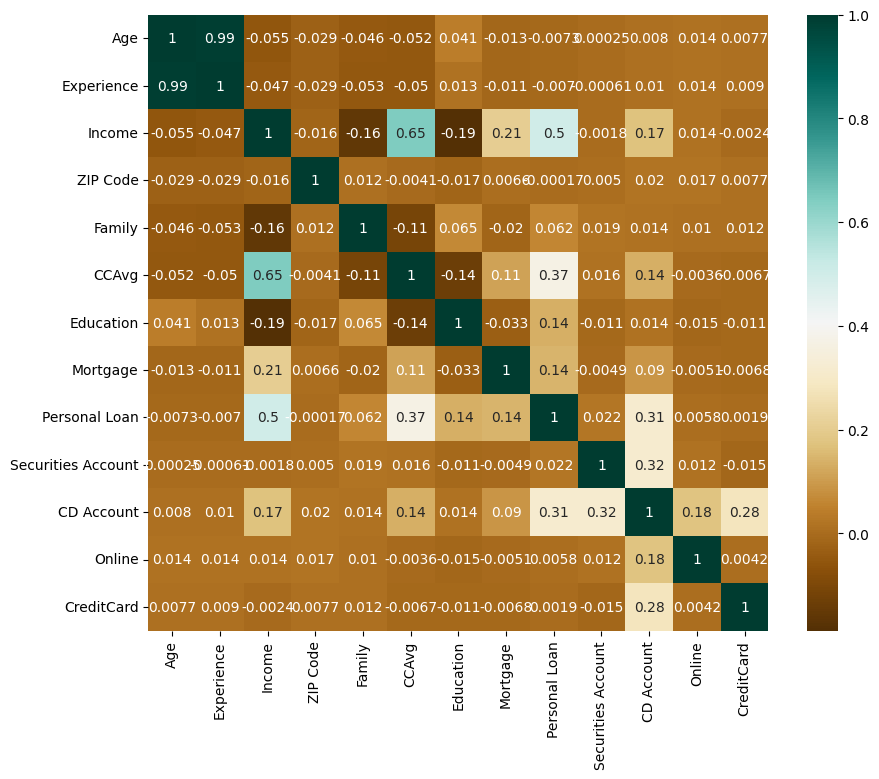

In [19]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(c,cmap='BrBG',annot=True)

<Axes: ylabel='count'>

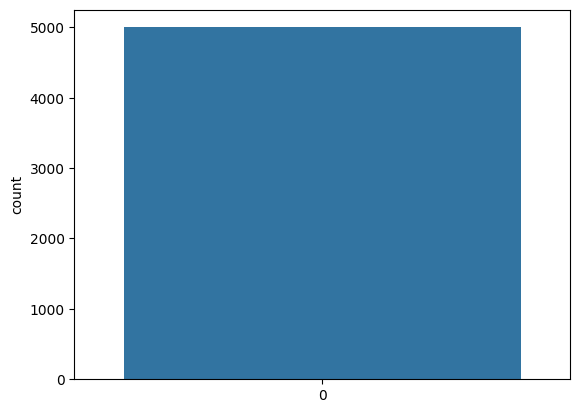

In [20]:
sns.countplot(df['CreditCard'])

In [21]:
z_class = df[df.CreditCard==0]
z_class.shape

(3530, 13)

In [22]:
o_class = df[df.CreditCard==1]
o_class.shape

(1470, 13)

In [23]:
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618


In [24]:
x = df_scaled
y = df['CreditCard']
x,y.head()

(           Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
 0    -1.774417   -1.666078 -0.538229 -0.964114  1.397414 -0.193385  -1.049078   
 1    -0.029524   -0.096330 -0.864109 -1.443932  0.525991 -0.250611  -1.049078   
 2    -0.552992   -0.445163 -1.363793  0.738814 -1.216855 -0.536736  -1.049078   
 3    -0.901970   -0.968413  0.569765  0.452243 -1.216855  0.436091   0.141703   
 4    -0.901970   -1.055621 -0.625130 -0.859007  1.397414 -0.536736   0.141703   
 ...        ...         ...       ...       ...       ...       ...        ...   
 4995 -1.425438   -1.491662 -0.733757 -0.214694 -1.216855 -0.021710   1.332484   
 4996 -1.338194   -1.404454 -1.276892 -0.525774  1.397414 -0.880087  -1.049078   
 4997  1.540880    1.647835 -1.081363 -0.061039 -0.345432 -0.937312   1.332484   
 4998  1.715370    1.735043 -0.538229 -1.469855  0.525991 -0.822862   0.141703   
 4999 -1.512683   -1.404454  0.200434 -0.254757  0.525991 -0.651186  -1.049078   
 
       Mortgag

In [25]:
x

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555274,-0.325568,-0.341130,-0.25354,0.821951
4996,-1.338194,-1.404454,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.281169,-0.325568,-0.341130,-0.25354,0.821951
4997,1.540880,1.647835,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4998,1.715370,1.735043,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,0.821951


In [30]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: CreditCard, Length: 5000, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.729


In [37]:
# save the model to disk
import pickle
pickle.dump(model, open('model_Activity5.pkl','wb'))